## H&M Customer Transaction Analysis (APPENDIX)


---
Team - Kaushiki Tiwary, Omar Alwehaib, Yifeng Chen, Zicheng Wang


# INTRODUCTION
This project will look at H&M’s customer purchase data to uncover patterns in clothing preferences and purchasing habits. By identifying these patterns, we will help optimize inventory management and enhance the overall shopping experience. The primary issue we address is the lack of precise insights into what drives customer purchases at H&M. According to McKinsey, retailers often struggle with excess inventory or stockouts due to unpredictable demand (McKinsey, 2023). We aim to identify common purchasing trends such as which clothing categories sell best in specific seasons, how frequently customers make repeat purchases, and which items are often bought together. These insights will enable H&M to refine its product offerings and minimize losses from unsold inventory. According to Forbes, predicting demand trends can help reduce waste and improve supply chain efficiency. (Forbes, 2023).
This project benefits multiple stakeholders by increasing H&M’s profitability through better inventory control and marketing efficiency, enhancing product availability and personalized shopping experiences for customers, and driving stronger financial performance for investors through data-backed decision-making.


# #1. EDA

# DATA LOADING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install --upgrade gdown
!gdown 'https://drive.google.com/uc?id=1z2q-VVx8_i_xrKlrYP68Wj_PLQ4Z27dq' -O my_articles.csv
my_articles = pd.read_csv("my_articles.csv")
my_articles.info()

Downloading...
From: https://drive.google.com/uc?id=1z2q-VVx8_i_xrKlrYP68Wj_PLQ4Z27dq
To: /content/my_articles.csv
100% 36.1M/36.1M [00:00<00:00, 50.7MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_val

In [ ]:
!pip install --upgrade gdown
!gdown 'https://drive.google.com/uc?id=1Mi-s9-ukDOJzqKZoZiy92gWPgxfU_WxQ' -O my_customers.csv
my_customers = pd.read_csv("my_customers.csv")
my_customers.info()

Downloading...
From (original): https://drive.google.com/uc?id=1Mi-s9-ukDOJzqKZoZiy92gWPgxfU_WxQ
From (redirected): https://drive.google.com/uc?id=1Mi-s9-ukDOJzqKZoZiy92gWPgxfU_WxQ&confirm=t&uuid=3fa059f6-54d8-48d1-8768-511cd6e367d2
To: /content/my_customers.csv
100% 207M/207M [00:03<00:00, 62.8MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
!pip install --upgrade gdown
!gdown 'https://drive.google.com/uc?id=1Mi-s9-ukDOJzqKZoZiy92gWPgxfU_WxQ' -O my_customers.csv
my_customers = pd.read_csv("my_customers.csv")
my_customers.info()

Downloading...
From (original): https://drive.google.com/uc?id=1Mi-s9-ukDOJzqKZoZiy92gWPgxfU_WxQ
From (redirected): https://drive.google.com/uc?id=1Mi-s9-ukDOJzqKZoZiy92gWPgxfU_WxQ&confirm=t&uuid=1f8795aa-0cd3-4941-b5d4-ece15851f1df
To: /content/my_customers.csv
100% 207M/207M [00:03<00:00, 66.2MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
!pip install --upgrade gdown
!gdown 'https://drive.google.com/uc?id=1xxksdtxc0PlzMkQc4ZirbUgCc2mAKvTO' -O transactions_train.csv
transactions_train = pd.read_csv("transactions_train.csv")
transactions_train.info()

Downloading...
From (original): https://drive.google.com/uc?id=1xxksdtxc0PlzMkQc4ZirbUgCc2mAKvTO
From (redirected): https://drive.google.com/uc?id=1xxksdtxc0PlzMkQc4ZirbUgCc2mAKvTO&confirm=t&uuid=3601d0b4-5a8f-48a6-a231-20c1edc16969
To: /content/transactions_train.csv
100% 3.49G/3.49G [00:46<00:00, 75.3MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


# DATA CLEANING

In [ ]:
transactions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
my_articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [ ]:
my_customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [ ]:
transactions_train.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [ ]:
my_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
my_articles.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
my_articles['product_type_name'].value_counts()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
product_type_name,
Trousers,11169
Dress,10362
Sweater,9302
T-shirt,7904
Top,4155
...,...
Towel,1
Cushion,1
Headband,1


In [ ]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
my_articles.isna().sum()

,0
article_id,0
product_code,0
prod_name,0
product_type_no,0
product_type_name,0
product_group_name,0
graphical_appearance_no,0
graphical_appearance_name,0
colour_group_code,0
colour_group_name,0


In [ ]:
my_articles.dropna(subset = ['detail_desc'], inplace=True)

In [ ]:
my_customers.isna().sum()

,0
customer_id,0
FN,895050
Active,907576
club_member_status,6062
fashion_news_frequency,16011
age,15861
postal_code,0


In [ ]:
transactions_train.isna().sum()

,0
t_dat,0
customer_id,0
article_id,0
price,0
sales_channel_id,0


<Axes: >

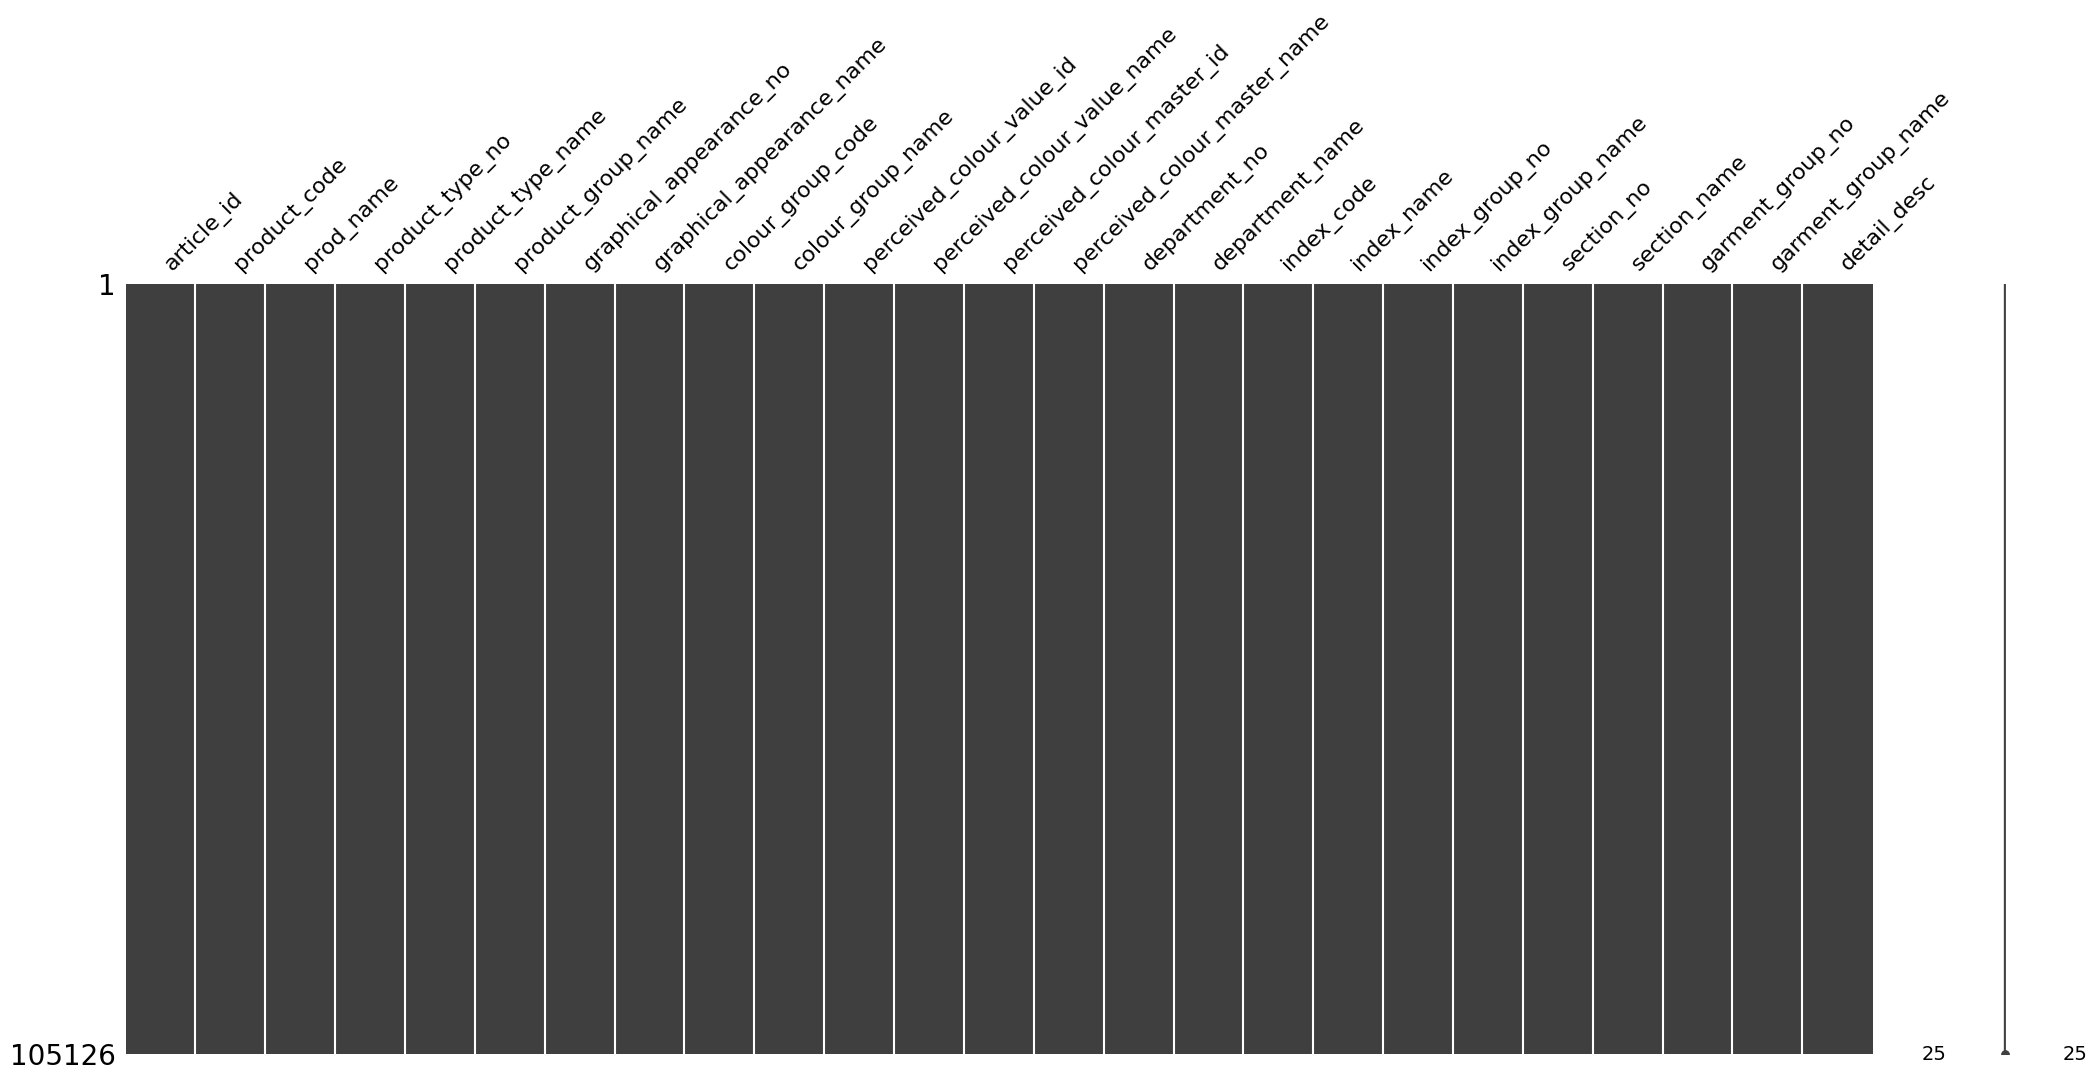

In [ ]:
import missingno as msno
msno.matrix(my_articles)

<Axes: >

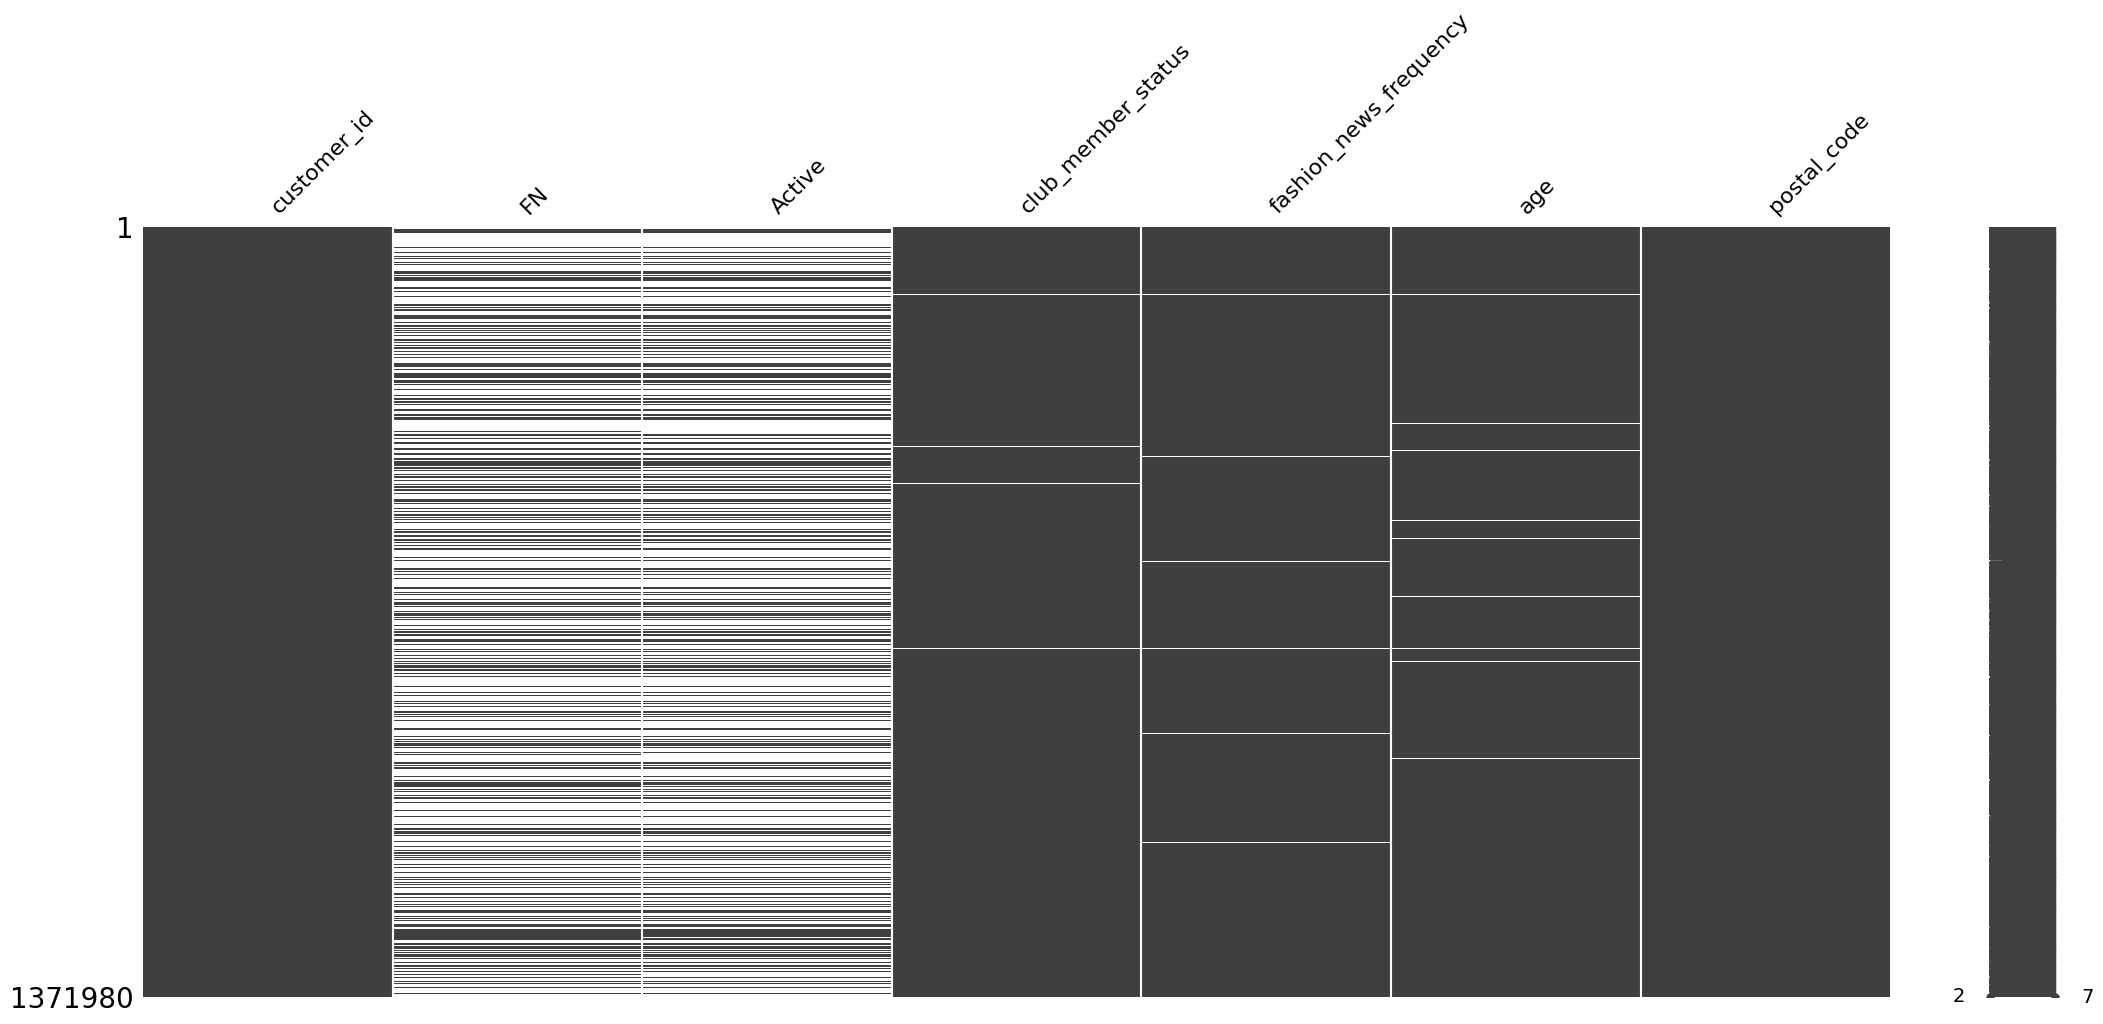

In [ ]:
msno.matrix(my_customers)

In [ ]:
my_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
my_customers = my_customers.dropna(subset=["FN", "Active", "club_member_status",
                       "fashion_news_frequency",
                       "age"])

In [ ]:
my_customers.FN.unique()

array([1.])

In [ ]:
my_customers.Active.unique()

array([1.])

In [ ]:
my_customers.club_member_status.unique()

array(['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [ ]:
my_customers.fashion_news_frequency.unique()

array(['Regularly', 'NONE', 'Monthly'], dtype=object)

In [ ]:
my_customers.drop(columns=["FN", "Active"], inplace=True)

<ipython-input-8-5baad7b37048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_customers.drop(columns=["FN", "Active"], inplace=True)


<Axes: >

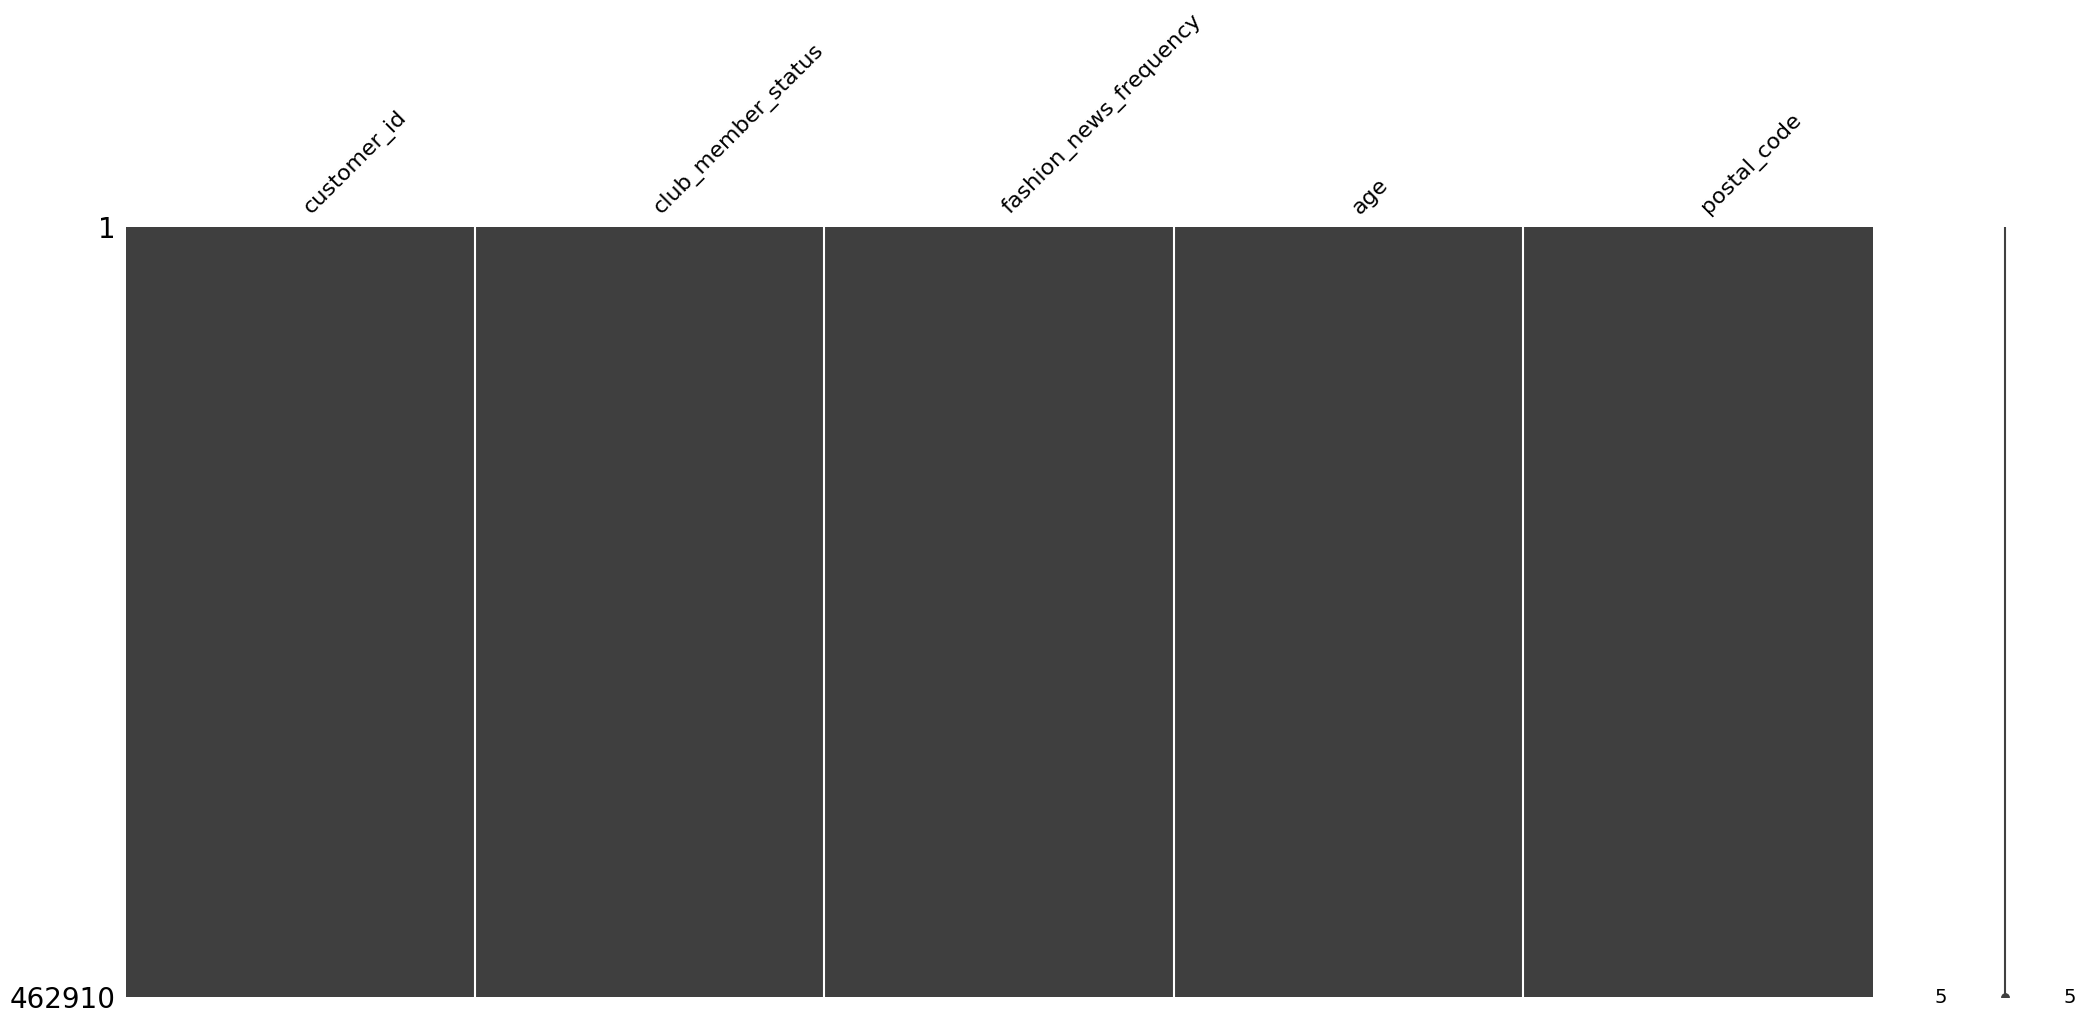

In [ ]:
msno.matrix(my_customers)

In [ ]:
my_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462910 entries, 4 to 1371978
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             462910 non-null  object 
 1   club_member_status      462910 non-null  object 
 2   fashion_news_frequency  462910 non-null  object 
 3   age                     462910 non-null  float64
 4   postal_code             462910 non-null  object 
dtypes: float64(1), object(4)
memory usage: 21.2+ MB


In [ ]:
transactions_train.shape

(31788324, 5)

In [ ]:
my_articles.shape

(105126, 25)

In [ ]:
# Make sure t_dat is a datetime type
#transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])

#start_date = '2019-01-01'
#end_date   = '2019-12-31'

# Keep only rows where t_dat is within [start_date, end_date]
#df_filtered = transactions_train[
    #(transactions_train['t_dat'] >= start_date) &
    #(transactions_train['t_dat'] <= end_date)
#]

# DATA MERGING

Initially, We attempted to merge the datasets; however, due to the high volume of data exceeding 16 million rows, a direct merge was computationally expensive. To optimize performance and memory usage, we first eliminated redundant features from the article dataset before performing the merge. This reduced dimensionality and minimized memory overhead, enabling a more efficient data integration process

In [ ]:
final_data = transactions_train.merge(
    my_articles[['article_id', 'prod_name']],
    on='article_id',
    how='left'
)

In [ ]:
final_data = final_data.merge(
    my_customers[['customer_id', 'club_member_status', 'fashion_news_frequency', 'age']],
    on='customer_id',
    how='left'
)

Removed transactions timeline

In [ ]:
final_data = final_data.drop(columns=['t_dat'])

In [ ]:
final_data.head()

,customer_id,article_id,price,sales_channel_id,prod_name,club_member_status,fashion_news_frequency,age
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Atlanta Push Body Harlow,NaN,NaN,NaN
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Rae Push (Melbourne) 2p,NaN,NaN,NaN
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,Inca Jumper,ACTIVE,Regularly,32.0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,W YODA KNIT OL OFFER,ACTIVE,Regularly,32.0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,W YODA KNIT OL OFFER,ACTIVE,Regularly,32.0


In [ ]:
final_data = final_data.drop(columns=['article_id'])

In [ ]:
print(final_data.isna().sum())
print(final_data.shape)


customer_id                      0
price                            0
sales_channel_id                 0
prod_name                   115027
club_member_status        18439167
fashion_news_frequency    18439167
age                       18439167
dtype: int64
(31788324, 7)


# #2. DATA **FITTING**

In [ ]:
def most_frequent(series):
    return series.value_counts().idxmax()


In [ ]:
cols_to_check = [
    'customer_id', 'price', 'prod_name',
    'club_member_status', 'fashion_news_frequency', 'age'
]
df_no_na = final_data.dropna(subset=cols_to_check, how='any')


df_user_products = (
    df_no_na
    .groupby('customer_id', as_index=False)
    .agg({
        'price': 'sum',
        'prod_name': lambda x: list(x),
        'club_member_status': most_frequent,
        'fashion_news_frequency': most_frequent,
        'age': most_frequent
    })
)

In [ ]:
df_user_products

,customer_id,price,prod_name,club_member_status,fashion_news_frequency,age
0,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,"[Hedwig essential, Molly, Baby Lock Me Up Push...",ACTIVE,Regularly,52.0
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,3.823610,"[Inca Jumper, W YODA KNIT OL OFFER, W YODA KNI...",ACTIVE,Regularly,32.0
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,5.007576,"[Madison skinny HW (1), Zingo sweater, Yate ho...",ACTIVE,Regularly,56.0
3,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,0.048780,"[Madison skinny HW (1), Madison skinny HW (1)]",ACTIVE,Regularly,29.0
4,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,0.864356,"[Siri Cardigan, PETER POLO, Flock (1), Flock (...",ACTIVE,Regularly,54.0
...,...,...,...,...,...,...
459261,ffff7d65748db4d52e48b74c8f83ccb0029fc3bbafa511...,0.066068,"[Desert TRS, Cane corso long crewneck]",ACTIVE,Regularly,20.0
459262,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,0.088102,"[Simone Denim TRS, Jade Denim TRS, Jade Denim ...",ACTIVE,Regularly,22.0
459263,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,0.122017,[Hanker],ACTIVE,Regularly,21.0
459264,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.788932,"[Hayes, SUPREME tights, SUPREME tights, Maui H...",ACTIVE,Regularly,21.0


In [ ]:
df_user_products = pd.read_csv('/content/df_user_products.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_user_products.shape

(459266, 6)

In [ ]:
type(df_user_products)

pandas.core.frame.DataFrame

In [ ]:
df_user_products.head(10)

,customer_id,price,prod_name,club_member_status,fashion_news_frequency,age
0,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,"['Hedwig essential', 'Molly', 'Baby Lock Me Up...",ACTIVE,Regularly,52.0
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,3.823610,"['Inca Jumper', 'W YODA KNIT OL OFFER', 'W YOD...",ACTIVE,Regularly,32.0
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,5.007576,"['Madison skinny HW (1)', 'Zingo sweater', 'Ya...",ACTIVE,Regularly,56.0
3,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,0.048780,"['Madison skinny HW (1)', 'Madison skinny HW (...",ACTIVE,Regularly,29.0
4,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,0.864356,"['Siri Cardigan', 'PETER POLO', 'Flock (1)', '...",ACTIVE,Regularly,54.0
5,0000b95f630aaa9313028ce9c41154bb95ac7afa34f55b...,0.033881,['Amber'],ACTIVE,Regularly,49.0
6,0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...,0.140576,"['LS Reggipetto Triangle Top', 'Timeless Tie T...",ACTIVE,Regularly,41.0
7,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,0.166661,"['ROY 3PK SLIM RN T-SHIRT', 'ROLAND SET IN', '...",ACTIVE,Regularly,27.0
8,0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...,3.858627,"['Trainer 3p sock', 'Lasse Fluff Sweater', 'An...",ACTIVE,Regularly,30.0
9,000114c6996ef5703a8d455faf2103f8488d3928348e07...,0.336983,"['Robert velcro SB', 'Chicago Twill Trousers',...",PRE-CREATE,Regularly,40.0


In [ ]:
df_user_products['club_member_status'].value_counts()

,count
club_member_status,
ACTIVE,453745
PRE-CREATE,5518
LEFT CLUB,3


In [ ]:
df_user_products['fashion_news_frequency'].value_counts()

,count
fashion_news_frequency,
Regularly,457988
Monthly,790
NONE,488


In [ ]:
df_user_products['age'].value_counts()

,count
age,
21.0,25391
20.0,20850
22.0,19088
23.0,18747
24.0,17690
...,...
95.0,2
91.0,2
97.0,1


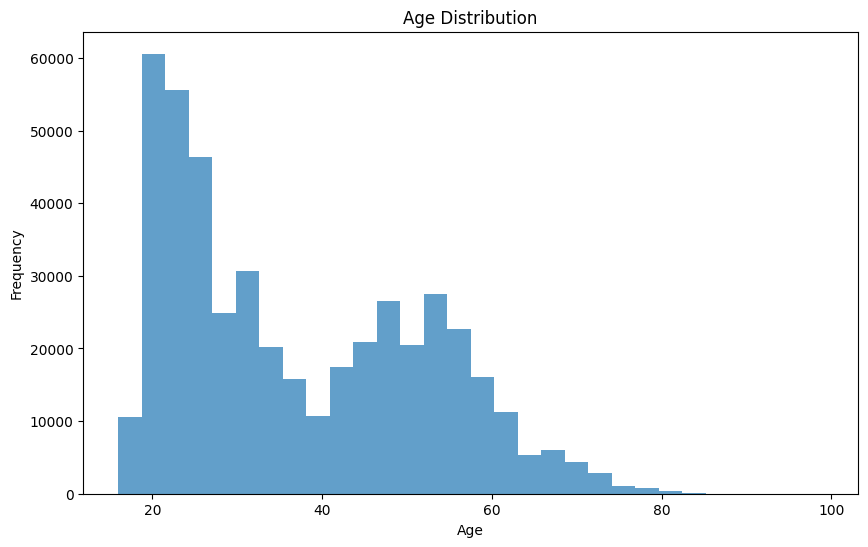

In [ ]:
df_user_products['age'].plot(kind='hist', bins=30, figsize=(10, 6), alpha=0.7)
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()


SUMMARY:

Based on the graph, The customers with highest frequency shopping were of the age between 20-35, Whereas customers from 40-60 has a medium level of frequency. It therefore exhibits, that H&M clothing has a mid-age crowd.

# **ASSOCIATION RULE**

In [ ]:
# 1)copy
df_ar = df_user_products[['customer_id', 'prod_name']].copy()

# 2) rename
df_ar = df_ar.rename(columns={
    'customer_id': 'User_ID',
    'prod_name': 'Product_Name'
})


print(df_ar.head())
df_ar.shape

                                             User_ID  \
0  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   
1  00007d2de826758b65a93dd24ce629ed66842531df6699...   
2  00009d946eec3ea54add5ba56d5210ea898def4b46c685...   
3  0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...   
4  0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...   

                                        Product_Name  
0  ['Hedwig essential', 'Molly', 'Baby Lock Me Up...  
1  ['Inca Jumper', 'W YODA KNIT OL OFFER', 'W YOD...  
2  ['Madison skinny HW (1)', 'Zingo sweater', 'Ya...  
3  ['Madison skinny HW (1)', 'Madison skinny HW (...  
4  ['Siri Cardigan', 'PETER POLO', 'Flock (1)', '...  


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(459266, 2)

In [ ]:
import ast
df_ar = df_ar.dropna(subset=['Product_Name'])

# jut keep str and list
df_ar = df_ar[df_ar['Product_Name'].apply(lambda x: isinstance(x, (str, list)))]

# ast.literal_eval
df_ar['Product_Name'] = df_ar['Product_Name'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# filter the costumer that buys 5 or more
df_ar_filtered = df_ar[df_ar['Product_Name'].apply(len) >= 5]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sourse of ast: https://docs.python.org/3/library/ast.html

In [ ]:
df_ar_filtered.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(342493, 2)

In [ ]:
df_ar_sample = df_ar_filtered.sample(frac=0.3, random_state=42)

# 2) Convert 'Product_Name' column to a list of lists
product_list1 = df_ar_sample['Product_Name'].tolist()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(product_list1)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


102748

In [ ]:
# 1) Group by 'article_id' and count occurrences
df_counts = (
    transactions_train
    .groupby('article_id')
    .size()
    .reset_index(name='count')
)

# 2) Calculate each article's proportion of total sales
total_sales = df_counts['count'].sum()
df_counts['proportion'] = df_counts['count'] / total_sales

# 3) Compute the mean proportion (fraction)
mean_prop = df_counts['proportion'].mean()

# 4) Convert to percentage
mean_prop_percentage = mean_prop * 100

# 5) Print with more readable formatting
decimal_places = 10

print(f"Mean proportion (percentage): {mean_prop_percentage:.{decimal_places}f}%")

# 6) Sort by 'proportion' in descending order
df_counts.sort_values(by='proportion', ascending=False, inplace=True)

# 7) Display the top rows
print(df_counts.head(10))



Mean proportion (percentage): 0.0009565076%
       article_id  count  proportion
53832   706016001  50287    0.001582
53833   706016002  35043    0.001102
1711    372860001  31718    0.000998
24808   610776002  30199    0.000950
70124   759871002  26329    0.000828
3706    464297007  25025    0.000787
1712    372860002  24458    0.000769
24807   610776001  22451    0.000706
2233    399223001  22236    0.000700
53834   706016003  21241    0.000668


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
transactions = te.fit(product_list1).transform(product_list1) # or fit_transform(data)

# Create a dataframe from the data
df_encoded = pd.DataFrame(transactions, columns=te.columns_)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_itemsets = fpgrowth(
    df_encoded,
    min_support=0.01,   #
    use_colnames=True   # show name not index
)

frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
print("Frequent Itemsets (top 30):")
print(frequent_itemsets.head(30))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets (top 30):
      support                       itemsets
0    0.090201               (Luna skinny RW)
67   0.086814     (Jade HW Skinny Denim TRS)
86   0.075632       (Timeless Midrise Brief)
74   0.068001                    (Tilly (1))
65   0.060663                    (Despacito)
91   0.056001                     (Cat Tee.)
87   0.050074  (Simple as That Triangle Top)
44   0.049655       (Shake it in Balconette)
89   0.049383          (Pluto RW slacks (1))
18   0.048926            (SUPREME RW tights)
54   0.045685                   (Tilda tank)
78   0.045130    (Skinny Ankle R.W Brooklyn)
41   0.044838           (7p Basic Shaftless)
92   0.044507  (Simple as that Cheeky Tanga)
33   0.042804                 (Nora T-shirt)
4    0.041490                      (Melrose)
1    0.040672        (Madison skinny HW (1))
35   0.040215                 (Primo slacks)
167  0.039232                 (Becka hoodie)
101  0.038512      (Hazelnut Push Melbourne)
36   0.037869              

In [ ]:
rules = association_rules(frequent_itemsets,
                          num_itemsets=frequent_itemsets.shape[0],
                          metric="support", min_threshold=0.01) #, metric="confidence", min_threshold=0.6
rules.sort_values(by=["confidence"])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
42,(Luna skinny RW),(Pluto RW slacks (1)),0.090201,0.049383,0.010102,0.111998,2.267954,1.0,0.005648,1.070513,0.614503,0.078022,0.065868,0.158285
41,(Jade HW Skinny Denim TRS),(Tilly (1)),0.086814,0.068001,0.010414,0.119955,1.764012,1.0,0.004510,1.059035,0.474285,0.072117,0.055745,0.136548
37,(Jade HW Skinny Denim TRS),(Cat Tee.),0.086814,0.056001,0.010998,0.126682,2.262128,1.0,0.006136,1.080933,0.610980,0.083432,0.074874,0.161533
33,(Jade HW Skinny Denim TRS),(Timeless Midrise Brief),0.086814,0.075632,0.011046,0.127242,1.682393,1.0,0.004481,1.059135,0.444169,0.072962,0.055833,0.136649
29,(Luna skinny RW),(Julia RW Skinny Denim TRS),0.090201,0.034667,0.011504,0.127536,3.678840,1.0,0.008377,1.106444,0.800370,0.101477,0.096203,0.229686
24,(Luna skinny RW),(Despacito),0.090201,0.060663,0.012146,0.134657,2.219754,1.0,0.006674,1.085508,0.603979,0.087561,0.078772,0.167441
20,(Luna skinny RW),(Tilly (1)),0.090201,0.068001,0.012273,0.136060,2.000837,1.0,0.006139,1.078777,0.549802,0.084100,0.073024,0.158269
14,(Luna skinny RW),(Madison skinny HW (1)),0.090201,0.040672,0.012331,0.136707,3.361179,1.0,0.008662,1.111242,0.772133,0.104023,0.100106,0.219945
12,(Luna skinny RW),(Skinny Ankle R.W Brooklyn),0.090201,0.045130,0.012351,0.136923,3.033974,1.0,0.008280,1.106355,0.736866,0.100427,0.096131,0.205296
23,(Jade HW Skinny Denim TRS),(Julia RW Skinny Denim TRS),0.086814,0.034667,0.012234,0.140919,4.064900,1.0,0.009224,1.123681,0.825672,0.111982,0.110068,0.246905


The analysis identifies frequently bought-together products in customer transactions. Items like “Luna Skinny RW”, “Jade HW Skinny Denim TRS”, and “Timeless Midrise Brief” frequently appear in purchases alongside related products. The confidence and lift values indicate strong associations, meaning customers who buy one item are significantly more likely to buy the other. These insights can be used for product bundling, personalized recommendations, and inventory optimization, helping to improve sales and enhance the shopping experience.

In [ ]:
rules.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(44, 14)

In [ ]:
#frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
#frequent_itemsets.sort_values(by="support")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#rules = association_rules(frequent_itemsets,
                          #num_itemsets=frequent_itemsets.shape[0],
                          #metric="support", min_threshold=0.0005) #, metric="confidence", min_threshold=0.6
#rules.sort_values(by=["confidence"])

# #3. GEN AI UNDERTAKING


# New Section

We used chatgpt and Deepseek to help us with our project, the below link provides all the prompts that were used through the period :
- https://chatgpt.com/c/67b69aa5-b524-8002-9fd0-232bdb20f419
- https://chat.deepseek.com/a/chat/s/3627a756-b151-4c50-b752-d6185ee6c6ae
